In [ ]:
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name():
    print('GPU device found:', tf.test.gpu_device_name())
else:
    print("No GPU found. Please check if GPU is enabled in your notebook.")


GPU device found: /device:GPU:0


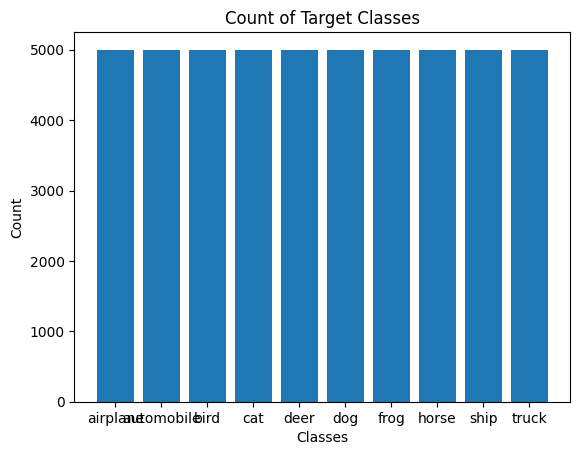

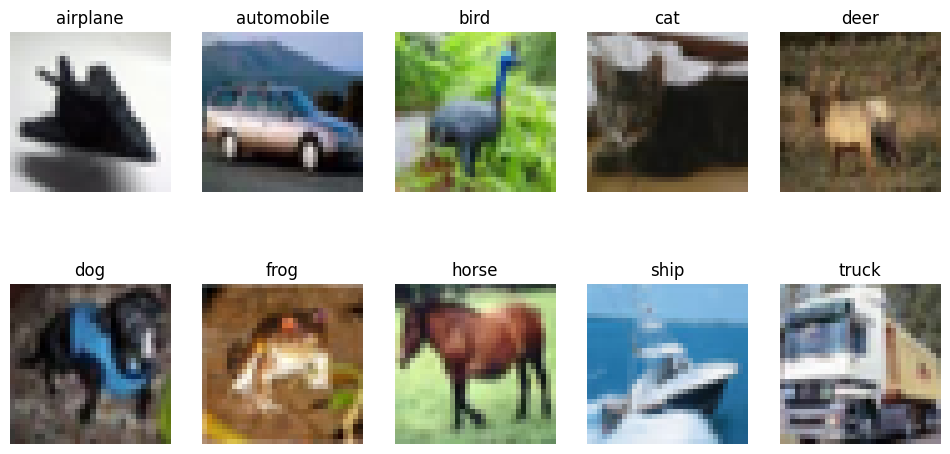

58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/100
1250/1250 [==============================] - 43s 31ms/step - loss: 1.8632 - accuracy: 0.2627 - val_loss: 1.5878 - val_accuracy: 0.3766
Epoch 2/100
1250/1250 [==============================] - 43s 34ms/step - loss: 1.3650 - accuracy: 0.4842 - val_loss: 1.1628 - val_accuracy: 0.5909
Epoch 3/100
1250/1250 [==============================] - 38s 31ms/step - loss: 1.0574 - accuracy: 0.6215 - val_loss: 0.9830 - val_accuracy: 0.6559
Epoch 4/100
1250/1250 [==============================] - 38s 30ms/step - loss: 0.9018 - accuracy: 0.6865 - val_loss: 0.9171 - val_accuracy: 0.6746
Epoch 5/100
1250/1250 [==============================] - 38s 31ms/step - loss: 0.7710 - accuracy: 0.7347 - val_loss: 0.7982 - val_accuracy: 0.7227
Epoch 6/100
1250/1250 [==============================] - 43s 35ms/step - loss: 0.6677 - accuracy: 0.7715 - val_loss: 0.7589 - val_accuracy: 0.7354
Epoch 7/100
1250/1250 [==============================

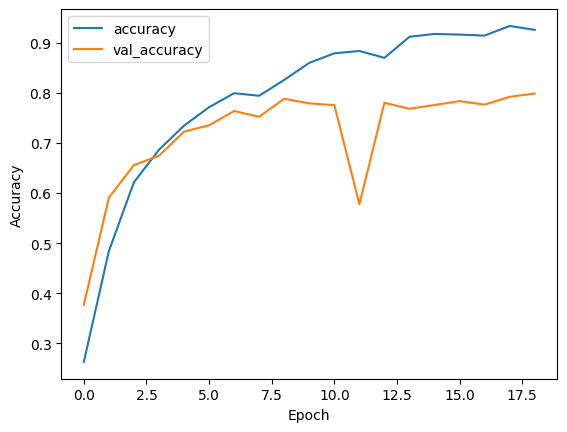

313/313 [==============================] - 2s 8ms/step - loss: 0.7122 - accuracy: 0.7795


[0.7122098207473755, 0.7795000076293945]

In [ ]:
# Import Necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Exploratory Data Analysis
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Count of target classes
class_counts = np.unique(y_train, return_counts=True)
plt.bar(class_names, class_counts[1])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Target Classes')
plt.show()

# Display one image of each class
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    img_index = np.where(y_train == i)[0][0]
    ax.imshow(x_train[img_index])
    ax.set_title(class_names[i])
    ax.axis('off')
plt.show()

# Preprocessing the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train Test Split
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Model Training & Evaluation
# Train without augmentation
base_model = VGG16(weights='imagenet', input_shape=(32, 32, 3), include_top=False)
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Training without augmentation
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val), callbacks=[early_stopping, model_checkpoint])

# Plot Learning Curves
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Display the evaluation report and other metrics
model.evaluate(x_test, y_test)
